### Introduction
Novel coronavirus pandemic is subject of research for number of data scientists. It is not exception that findings related to COVID-19disease spread amongst world followed different trends with respect to time. Since it was find identified in December 2019, As of 18 February 2021, more than 110 million cases have been confirmed, with more than 2.43 million deaths attributed to COVID-19. It is declared as public health emergency by WHO. As huge number of datasets available about outbreak, number of techniques such as clustering can give vivid picture related to patterns of COVID-19 spread, recovery, death around the world. Those findings can reveal number of facts based on cluster identification and differentiation amongst clusters, behaviour of recovery, death and counts of newly infected individuals across the globe. Due to unknown pattern of disease spread it becomes important to have detailed research than rudimentary understanding of spread pattern which later can be elaborated in findings like anomalies or defects in data. Previously unknown patterns in data can assist us to find categorization or association between datapoints. In current research we are mainly focused on clustering techniques like Kmeans and DBScan accompanied with PCA principal component analysis prior to clustering. 


In [2]:
## Fundamental Python Libraries

import pandas as pd                                                       
import numpy as np 
import math
import copy
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"

## Data Visualization Libraries

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns                                                   
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Data Pre-Processing Libraries

from sklearn.model_selection import train_test_split

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler                     ## median and quntile
from sklearn.preprocessing import MinMaxScaler                     ## Normalization Technique


## Dimension Reduction Libraries

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import NMF                             ## Non Negative Matrix Factorization
from sklearn.manifold import TSNE

## Regression Libraries

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



## Evaluation Metrics Libraries

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing



Data source and Data Characteristics 
Centre for Systems Science and Engineering (CSSE) at Johns Hopkins University has repository on GitHub which has commits each day with several datasets that enabled to gather datasets which are imposed to unsupervised learning. Datasets contained significant information like Confirmed cases, Deaths, Recovered cases, Active cases, Case Fatality Ratio for around 3798 observations. Those variables count for each country over the time is crucial aspect of research about application of clustering techniques. This research helps to reveal previously unknown patterns in observations as unlabelled data provides more details about changes in spread of infection or impact of infection of mortality, recovery rate for almost all countries comprised in observations. Datasets are samples from 14th January 2021 and 15th February 2021 with equal number of observations with exactly same variables for exactly same countries. Datasets are almost identical in dimension but values of each observation varies and that lead to interesting findings. 


"Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1"

In [3]:
data = pd.read_csv("D:\\DATASCIENCEMASTER\\Unsupervised\\ULfilecovid_datapoints14jan.csv")

Data Characteristics:
Data has below variables where we can see NA’s.
Confirmed               0
Deaths                  0
Recovered               0
Active                  2
Case_Fatality_Ratio    37


Variable Confirmed refers to confirm cases. In epidemiology, case-fatality ratio that is proportion of deaths compared to the total number of people diagnosed over specific period which predominantly explains severity of infection spread or disease. Other variables are obvious like Deaths, Recovered, & active refers to number of infected individuals which still haven’t recovered but not dead. All variables are interger type but we see Case_Fatality_Ratio as object that means we need to clean data for further analysis.removal of NA's is essential steps prior to PCA and clustering.




In [4]:
data.head()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
0,53775,2314,45298,5985.0,4.30311483
1,65994,1261,39246,25487.0,1.910779768
2,103127,2822,69992,30313.0,2.736431778
3,8868,88,8091,689.0,0.99233198
4,18613,425,16008,2180.0,2.283350347


In [5]:
data.isnull().sum()

Confirmed               0
Deaths                  0
Recovered               0
Active                  2
Case_Fatality_Ratio    37
dtype: int64

In [6]:
data.shape

(3977, 5)

In [7]:
data = data.dropna()

In [8]:
data.shape

(3939, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 0 to 3976
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Confirmed            3939 non-null   int64  
 1   Deaths               3939 non-null   int64  
 2   Recovered            3939 non-null   int64  
 3   Active               3939 non-null   float64
 4   Case_Fatality_Ratio  3939 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 184.6+ KB


In [10]:
data['Case_Fatality_Ratio'] = np.where(data['Case_Fatality_Ratio'] == '#DIV/0!', np.nan, data['Case_Fatality_Ratio'])

In [11]:
data.isnull().sum()

Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Case_Fatality_Ratio    2
dtype: int64

In [12]:
data = data.dropna()

Scaling variables to standard range is custom now a days while using any machine learing algorithm. we have selected MinMaxScaler for better performance of algorithm.Data scaling is always first step before we proceed for Kmeans or DBscan. we are using Normalization technique that is MinMaxScaler for current analysis.it  is observed that predictive modelling results are improved by doing so.difficulty arising due to different scales of input variable while medelling certain problem is overcomed by using normalization.Kmeans or other algorithms of Dimesion reduction are usually affected because of difference in scaling.Using scikit-learn object MinMaxScaler which offers default scale to rescale variables into the range [0,1] we have below results.



In [13]:
data.isnull().sum()

Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Case_Fatality_Ratio    0
dtype: int64

In [14]:
scale = MinMaxScaler()

In [15]:
scale_data = scale.fit_transform(data)

Most common applications of Priniciple component analysis are data visualisation and reductions of dimensions. we will have look at below methodology of PCA to reduce dimensions which will speed up our present learning algorithm.below method in PCA the number of components parameter is 0.95 meaning that Scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.In order to preserve no features with the maximum variance with scikit-learn I am able to do it.in below code,PCA does not "discard" or "retain" any of your pre-defined features.we achieve here orthogonal directions of maximum variance.we have initialize PCA class by passing the number of components retained with variance n_components = 0.95. Then we call the fit and transform methods by passing the feature set to these methods. The transform method is used to retain given number of principal components.

In [16]:
scale_data = scale.fit_transform(data)
pca = PCA(n_components = 0.95)

pca.fit(scale_data)

data_pca = pca.transform(scale_data)

PCA(n_components=0.95)

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


### Kmeans Clusterring:
we have selected elbow method to determine optimal number of clusters.In below code we can see we are fitting multiple k-means algorithms and storing the values in an empty list wss = [].We have first fit multiple k-means models.we have increased the number of clusters in each model.Inertia value of each model is stored.Plot is used to vizualize results of the same below.

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WSS')

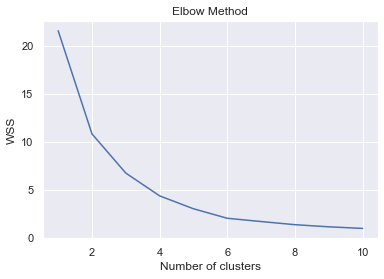

In [18]:
wss = []

for i in range(1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(data_pca)
    wss.append(KM.inertia_)

plt.plot(range(1,11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

using elbow method we determined clusters.Kmeans effectively classifies data before it is being trained. we see data is devided in number of clusters. silhouette_score will be helpful to determine separation distance between clusters.here silhouette_score can be guide to confirm if cluster is away from neighbouring cluster or not. Silhouette coefficients values close to +1 suggest here that cluster is separated away from neighbouring cluster.n_clusters = 2 has silhouette_score close to +1 that is 0.9766786438453611, whereas cluster 3, cluster 4 has 0.9268442627984615 and 0.9276899156930337 respectively. so we will select n_clusters = 2 for analysis.  



In [19]:
k_means = KMeans(n_clusters = 2, random_state = 15)
k_means.fit(data_pca)
labels_2 = k_means.labels_
silhouette_score(data_pca, labels_2)

KMeans(n_clusters=2, random_state=15)

0.9766786438453611

In [20]:
k_means_1 = KMeans(n_clusters = 3, random_state = 15)

k_means_1.fit(data_pca)

labels_3 = k_means_1.labels_

silhouette_score(data_pca, labels_3)

KMeans(n_clusters=3, random_state=15)

0.9268442627984615

In [21]:
k_means_2 = KMeans(n_clusters = 4, random_state = 15)

k_means_2.fit(data_pca)

labels_4 = k_means_2.labels_

silhouette_score(data_pca, labels_4)

KMeans(n_clusters=4, random_state=15)

0.9276899156930337

In [22]:
data_cluster = copy.deepcopy(data)

in order to avoid alterations in original data we created copy of original dataframe.

In [23]:
data_cluster.head()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
0,53775,2314,45298,5985.0,4.30311483
1,65994,1261,39246,25487.0,1.910779768
2,103127,2822,69992,30313.0,2.736431778
3,8868,88,8091,689.0,0.99233198
4,18613,425,16008,2180.0,2.283350347


In [24]:
data_cluster.isnull().sum()

Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Case_Fatality_Ratio    0
dtype: int64

In [25]:
data_cluster['Cluster'] = labels_2

we have done labelling to the clusters.for each observation we have assigned cluster membership. 

In [26]:
data_cluster.head()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,Cluster
0,53775,2314,45298,5985.0,4.30311483,0
1,65994,1261,39246,25487.0,1.910779768,0
2,103127,2822,69992,30313.0,2.736431778,0
3,8868,88,8091,689.0,0.99233198,0
4,18613,425,16008,2180.0,2.283350347,0


In [27]:
data_cluster.groupby('Cluster').mean()

,Confirmed,Deaths,Recovered,Active
Cluster,,,,
0,1.905522e+04,389.869875,9.666286e+03,8998.657754
1,1.828059e+06,46243.300000,1.124194e+06,657621.200000


we have done profiling to see difference between two clusters.  

In [28]:
data_cluster['death_confirmed'] = data_cluster['Deaths'] / data_cluster['Confirmed']

data_cluster['recover_confirmed'] = data_cluster['Recovered'] / data_cluster['Confirmed']

data_cluster['active_confirmed'] = data_cluster['Active'] / data_cluster['Confirmed']


In order to analyse difference between popuation of two clusters we have created another columns with ratios like data_cluster['Deaths'] / data_cluster['Confirmed'],data_cluster['Recovered'] / data_cluster['Confirmed'],data_cluster['Active'] / data_cluster['Confirmed'] which are death_confirmed,recover_confirmed,active_confirmed respectively. we will follow same logic for DBScan also later. 

In [29]:
data_cluster.groupby('Cluster').mean()

,Confirmed,Deaths,Recovered,Active,death_confirmed,recover_confirmed,active_confirmed
Cluster,,,,,,,
0,1.905522e+04,389.869875,9.666286e+03,8998.657754,0.019387,0.119182,0.861456
1,1.828059e+06,46243.300000,1.124194e+06,657621.200000,0.026526,0.698250,0.275224


it is obvious from above results cluster 0 lower recovery rate as compared to cluster 1, whereas active confirmed count is also higher in cluster 0 than cluster 1. cluster one has recovered confirmed 0.698250 which is higher than in cluster 1. but what we see significant anomalies in data may exist as we see death counts.

### DBSCAN Data preparation- profiling and results.
lets import DBSCAN from SKLEARN as we proceed now to see results using DBScan.
DBSCAN is Density-Based Spatial Clustering of Applications with Noise.if our data has clusters of same density then DBScan is best approach. as we know Kmeans uses least-squares optimization, whereas DBSCAN is based on density-connected regions. we will be using same methodology of fitting, profiling labelling as in Kmeans above.  

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
# Instantiate DBSCAN

dbscan = DBSCAN(eps = .25)

eps tells within what range all points should lie.

In [32]:
## fit the model

model = dbscan.fit(data_pca)

In [33]:
labels = model.labels_

In [34]:
silhouette_score(data_pca, labels)

0.9715482764206032

In [35]:
cluster_dbscan = copy.deepcopy(data)

In [36]:
cluster_dbscan.head()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
0,53775,2314,45298,5985.0,4.30311483
1,65994,1261,39246,25487.0,1.910779768
2,103127,2822,69992,30313.0,2.736431778
3,8868,88,8091,689.0,0.99233198
4,18613,425,16008,2180.0,2.283350347


In [37]:
cluster_dbscan['Cluster'] = labels

In [38]:
cluster_dbscan.head()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,Cluster
0,53775,2314,45298,5985.0,4.30311483,0
1,65994,1261,39246,25487.0,1.910779768,0
2,103127,2822,69992,30313.0,2.736431778,0
3,8868,88,8091,689.0,0.99233198,0
4,18613,425,16008,2180.0,2.283350347,0


In [39]:
cluster_dbscan.groupby('Cluster').mean()

,Confirmed,Deaths,Recovered,Active
Cluster,,,,
-1,1.673015e+06,39719.333333,7.161998e+05,917095.666667
0,1.927861e+04,391.206317,9.849901e+03,9037.097300
1,1.476904e+06,43852.000000,1.246708e+06,186344.600000


In [40]:
cluster_dbscan['death_confirmed'] = cluster_dbscan['Deaths'] / cluster_dbscan['Confirmed']

cluster_dbscan['recover_confirmed'] = cluster_dbscan['Recovered'] / cluster_dbscan['Confirmed']

cluster_dbscan['active_confirmed'] = cluster_dbscan['Active'] / cluster_dbscan['Confirmed']


In [41]:
cluster_dbscan.groupby('Cluster').mean()

,Confirmed,Deaths,Recovered,Active,death_confirmed,recover_confirmed,active_confirmed
Cluster,,,,,,,
-1,1.673015e+06,39719.333333,7.161998e+05,917095.666667,0.758609,0.326271,-0.084879
0,1.927861e+04,391.206317,9.849901e+03,9037.097300,0.018261,0.119420,0.862342
1,1.476904e+06,43852.000000,1.246708e+06,186344.600000,0.030032,0.841404,0.128564


here cluster -1 is anomaly. Where as we can see cluster 0 has recovery rate is less(11.94%) and active to confirm rate(86.23%) than cluster 1. Cluster 1 has 84% & 12.8% respective ratios of recover_confirmed & active_confirmed.

In [42]:
data.describe()

,Confirmed,Deaths,Recovered,Active
count,3.937000e+03,3937.000000,3.937000e+03,3.937000e+03
mean,2.365010e+04,506.337821,1.249719e+04,1.064616e+04
std,1.175187e+05,2885.652974,8.517191e+04,6.776462e+04
min,1.000000e+00,0.000000,0.000000e+00,-8.706000e+03
25%,8.440000e+02,12.000000,0.000000e+00,7.050000e+02
50%,2.288000e+03,36.000000,0.000000e+00,1.922000e+03
75%,8.868000e+03,126.000000,0.000000e+00,5.658000e+03
max,2.845701e+06,75199.000000,2.236938e+06,2.759142e+06


In [43]:
data[data['Active'] < 0]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
32,11588,20294,0,-8706.0,175.1294443
58,149686,2930,147016,-260.0,1.957430889
2578,35,95,0,-60.0,271.4285714


In [44]:
data['Active'] = data['Active'].abs()

In [45]:
data['Active'].describe()

count    3.937000e+03
mean     1.065075e+04
std      6.776390e+04
min      0.000000e+00
25%      7.080000e+02
50%      1.923000e+03
75%      5.670000e+03
max      2.759142e+06
Name: Active, dtype: float64

In [46]:
data[data['Active']==0]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
8,118,3,115,0.0,2.542372881
13,234,13,221,0.0,5.555555556
79,13,0,13,0.0,0
83,24,0,24,0.0,0
85,266,1,265,0.0,0.37593985
89,13,0,13,0.0,0
111,993,6,987,0.0,0.604229607
113,590,6,584,0.0,1.016949153
115,182,2,180,0.0,1.098901099
118,147,2,145,0.0,1.360544218


In [47]:
scale_data = scale.fit_transform(data)

pca = PCA(n_components = 0.95)

pca.fit(scale_data)

data_pca = pca.transform(scale_data)

PCA(n_components=0.95)

In [48]:
model = dbscan.fit(data_pca)

In [49]:
labels = model.labels_

In [50]:
silhouette_score(data_pca, labels)

0.9715402505101621

In [51]:
new_dbscan = copy.deepcopy(data)

In [52]:
new_dbscan['death_confirmed'] = new_dbscan['Deaths'] / new_dbscan['Confirmed']

new_dbscan['recover_confirmed'] = new_dbscan['Recovered'] / new_dbscan['Confirmed']

new_dbscan['active_confirmed'] = new_dbscan['Active'] / new_dbscan['Confirmed']


In [53]:
new_dbscan['Cluster'] = labels

In [54]:
new_dbscan.groupby('Cluster').mean()

,Confirmed,Deaths,Recovered,Active,death_confirmed,recover_confirmed,active_confirmed
Cluster,,,,,,,
-1,1.673015e+06,39719.333333,7.161998e+05,920017.666667,0.758609,0.326271,0.736981
0,1.927861e+04,391.206317,9.849901e+03,9037.229750,0.018261,0.119420,0.862343
1,1.476904e+06,43852.000000,1.246708e+06,186344.600000,0.030032,0.841404,0.128564


In [55]:
new_dbscan.head(10)

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,death_confirmed,recover_confirmed,active_confirmed,Cluster
0,53775,2314,45298,5985.0,4.30311483,0.043031,0.842362,0.111297,0
1,65994,1261,39246,25487.0,1.910779768,0.019108,0.594690,0.386202,0
2,103127,2822,69992,30313.0,2.736431778,0.027364,0.678697,0.293939,0
3,8868,88,8091,689.0,0.99233198,0.009923,0.912382,0.077695,0
4,18613,425,16008,2180.0,2.283350347,0.022834,0.860044,0.117122,0
5,184,6,156,22.0,3.260869565,0.032609,0.847826,0.119565,0
6,1770715,45125,1549490,176100.0,2.548405588,0.025484,0.875065,0.099451,1
7,163576,2963,151849,8764.0,1.811390424,0.018114,0.928309,0.053578,0
8,118,3,115,0.0,2.542372881,0.025424,0.974576,0.000000,0
9,5045,54,3227,1764.0,1.0703667,0.010704,0.639643,0.349653,0


In [56]:
new_dbscan[new_dbscan['Cluster'] == -1]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,death_confirmed,recover_confirmed,active_confirmed,Cluster
32,11588,20294,0,8706.0,175.1294443,1.751294,0.000000,0.751294,-1
215,2845701,68942,182673,2594086.0,2.422671953,0.024227,0.064193,0.911581,-1
268,1981623,50291,1877588,53744.0,2.537869211,0.025379,0.947500,0.027121,-1
649,2364801,23495,2236938,104368.0,0.993529688,0.009935,0.945931,0.044134,-1
2578,35,95,0,60.0,271.4285714,2.714286,0.000000,1.714286,-1
3958,2834341,75199,0,2759142.0,2.653138772,0.026531,0.000000,0.973469,-1


In [58]:
cluster_0 = new_dbscan[new_dbscan['Cluster'] == 0]

In [59]:
cluster_0[:50]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,death_confirmed,recover_confirmed,active_confirmed,Cluster
0,53775,2314,45298,5985.0,4.30311483,0.043031,0.842362,0.111297,0
1,65994,1261,39246,25487.0,1.910779768,0.019108,0.594690,0.386202,0
2,103127,2822,69992,30313.0,2.736431778,0.027364,0.678697,0.293939,0
3,8868,88,8091,689.0,0.99233198,0.009923,0.912382,0.077695,0
4,18613,425,16008,2180.0,2.283350347,0.022834,0.860044,0.117122,0
5,184,6,156,22.0,3.260869565,0.032609,0.847826,0.119565,0
7,163576,2963,151849,8764.0,1.811390424,0.018114,0.928309,0.053578,0
8,118,3,115,0.0,2.542372881,0.025424,0.974576,0.000000,0
9,5045,54,3227,1764.0,1.0703667,0.010704,0.639643,0.349653,0
10,93,0,74,19.0,0,0.000000,0.795699,0.204301,0


### Conclusion:

we see that come columns with jumbled values are handled by Dbscan better than Kmeans. we can conclude that Kmeans allocates observations in any possible clusters irrespective of treating anomalies differently. where Dbscan treated cluster -1 which is anomaly as separate cluster. even analysis has data issues DBscan has one useful application which is not only clusters  but anomalies findings.